# Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [3]:
data= pd.read_excel("ENB2012_data.xlsx") # loading data

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [5]:
data=data.drop(['Unnamed: 10','Unnamed: 11'], axis=1)

In [6]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [7]:
data.info() #Checking data type and null-values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
data.isnull().sum()   #checking is there any null value or not.

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [9]:
data['Y2'].value_counts()  # Here value_counts is use to check how many similar values present in Y2 column.

29.79    4
14.28    4
21.33    4
14.27    4
17.20    4
        ..
26.95    1
37.20    1
18.15    1
14.42    1
20.71    1
Name: Y2, Length: 636, dtype: int64

In [10]:
data.drop("Y1",axis=1,inplace=True)   # We have to calculate for cooling Load, so we drop column for heating Load.
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


Text(0.5, 1.0, 'Glazing Area Distribution')

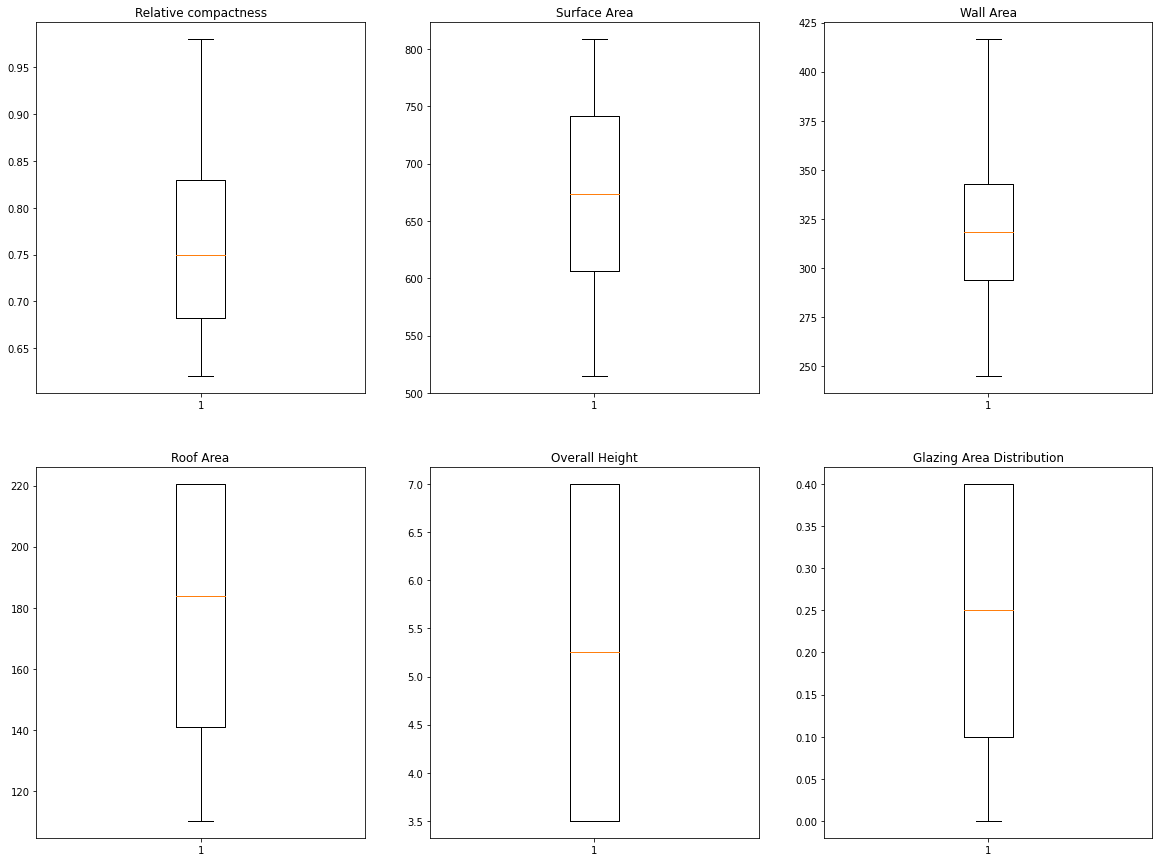

In [11]:
plt.figure(figsize = (20, 15))

ax = plt.subplot(231)
plt.boxplot(data.X1)
ax.set_title('Relative compactness')

ax = plt.subplot(232)
plt.boxplot(data.X2)
ax.set_title('Surface Area')

ax = plt.subplot(233)
plt.boxplot(data.X3)
ax.set_title('Wall Area')

ax = plt.subplot(234)
plt.boxplot(data.X4)
ax.set_title('Roof Area')

ax = plt.subplot(235)
plt.boxplot(data.X5)
ax.set_title('Overall Height')

ax = plt.subplot(236)
plt.boxplot(data.X7)
ax.set_title('Glazing Area Distribution')

In [12]:
# Now we shall split our model into X and Y parts to finally predict the results using several algorithms.

X=data[data.columns[:8]]  # It contain all independent attributes
Y=data['Y2']  # It contain dependent attribute

In [13]:
X.shape,' ',Y.shape   # as earlier explain our data contain 768 rows and 9 column( One column we drop above.)

((768, 8), ' ', (768,))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

print(X_train.shape,"  ",X_test.shape)
print(y_train.shape,"  ",y_test.shape)

(537, 8)    (231, 8)
(537,)    (231,)


# Linear Regression

In [14]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [15]:
data.corr()  # calculating the corelation to see the relation between each attribute

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.050525
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,1.000000


<AxesSubplot:>

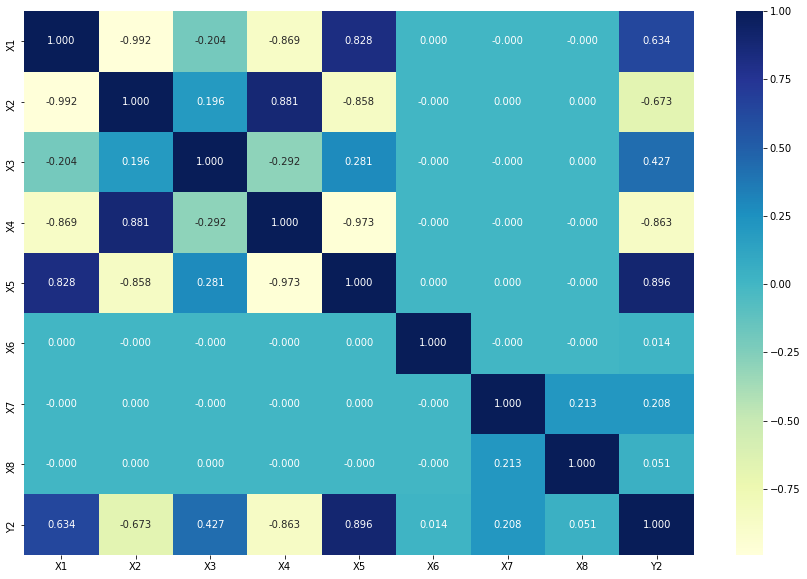

In [16]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu",fmt='0.3f')  # Plotting heatmap of correlation

In [17]:
import statsmodels.formula.api as smf # fitting the model

model02 = smf.ols('Y2~X1+X2+X3+X4+X5+X6+X7+X8', data = data).fit()

In [18]:
model02.params

Intercept    97.245749
X1          -70.787707
X2           -0.066090
X3            0.022528
X4           -0.044309
X5            4.283843
X6            0.121510
X7           14.717068
X8            0.040697
dtype: float64

In [19]:
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     859.1
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        19:49:23   Log-Likelihood:                -1979.3
No. Observations:                 768   AIC:                             3975.
Df Residuals:                     760   BIC:                             4012.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.2457     20.765      4.683      0.000      56.483     138.009
X1           -70.7877     11.225     -6.306      0.000     -92.824     -48.751
X2            -0.0661      0.015     -4.519      0.000      -0.095      -0.037
X3             0.0225      0.004      5.365      0.000       0.014       0.031
X4            -0.0443      0.008     -5.404      0.000      -0.060      -0.028
X5             4.2838      0.369     11.618      0.000       3.560       5.008
X6             0.1215      0.103      1.176      0.240      -0.081       0.324
X7            14.7171      0.888     16.573      0.000      12.974      16.460
X8             0.0407      0.076      0.534      0.594      -0.109       0.190
==============================================================================
Omnibus:                      104.668   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.547
Skew:                           0.767   Prob(JB):                     8.65e-51
Kurtosis:                       5.203   Cond. No.                     1.09e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.81e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
#prepare a model based on Orientation
model_O=smf.ols('Y2~X6',data=data).fit()
model_O.params

Intercept    24.162474
X6            0.121510
dtype: float64

In [25]:
model_O.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1564
Date:                Thu, 12 Aug 2021   Prob (F-statistic):              0.693
Time:                        14:54:20   Log-Likelihood:                -2819.2
No. Observations:                 768   AIC:                             5642.
Df Residuals:                     766   BIC:                             5652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.1625      1.129     21.406      0.000      21.947      26.378
X6             0.1215      0.307      0.396      0.693      -0.482       0.725
==============================================================================
Omnibus:                      392.702   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.149
Skew:                           0.395   Prob(JB):                     3.20e-14
Kurtosis:                       1.851   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#prepare a model based on Glazing Area Distribution
model_GD=smf.ols('Y2~X8', data=data).fit()
model_GD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.960
Date:                Thu, 12 Aug 2021   Prob (F-statistic):              0.162
Time:                        14:54:20   Log-Likelihood:                -2818.3
No. Observations:                 768   AIC:                             5641.
Df Residuals:                     766   BIC:                             5650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.7161      0.711     33.366      0.000      22.321      25.111
X8             0.3099      0.221      1.400      0.162      -0.125       0.744
==============================================================================
Omnibus:                      391.345   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.251
Skew:                           0.396   Prob(JB):                     3.04e-14
Kurtosis:                       1.852   Cond. No.                         7.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Finally prepare a model based on Glazing Area Distribution and Orientation
model_OG=smf.ols('Y2~X6+X8', data=data).fit()
model_OG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.057
Date:                Thu, 12 Aug 2021   Prob (F-statistic):              0.348
Time:                        14:54:20   Log-Likelihood:                -2818.3
No. Observations:                 768   AIC:                             5643.
Df Residuals:                     765   BIC:                             5656.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.2908      1.289     18.075      0.000      20.761      25.820
X6             0.1215      0.307      0.396      0.692      -0.481       0.724
X8             0.3099      0.221      1.399      0.162      -0.125       0.745
==============================================================================
Omnibus:                      393.370   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.260
Skew:                           0.396   Prob(JB):                     3.02e-14
Kurtosis:                       1.851   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here again there is no difference.

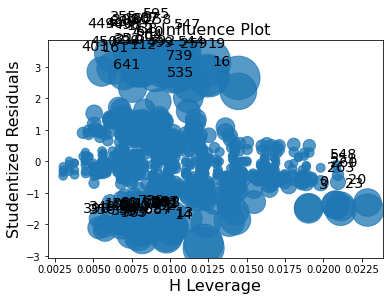

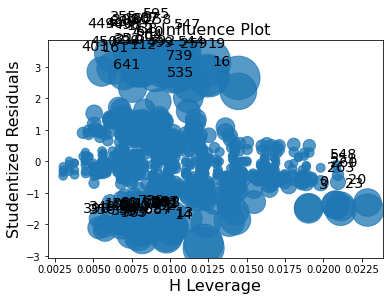

In [28]:
# Checking whether data has any influential values 
import statsmodels.api as sm
sm.graphics.influence_plot(model02)


In [29]:
# Confidence interval
print(model02.conf_int(0.05)) # 95% confidnece level

                   0           1
Intercept  56.482747  138.008752
X1        -92.823923  -48.751491
X2         -0.094802   -0.037379
X3          0.014284    0.030771
X4         -0.060405   -0.028213
X5          3.559993    5.007694
X6         -0.081312    0.324333
X7         12.973809   16.460328
X8         -0.109041    0.190436


In [30]:
pred02=model02.predict(data)  # predicting data
pred02

0      25.838230
1      25.959741
2      26.081251
3      26.202762
4      28.271956
         ...    
763    19.774852
764    19.758785
765    19.880296
766    20.001806
767    20.123316
Length: 768, dtype: float64

In [31]:
rsq_X1 = smf.ols('X1~X2+X3+X4+X5+X6+X7+X8',data=data).fit().rsquared  # residual square 
vif_X1 = 1/(1-rsq_X1)
print(rsq_X1 , '  ', vif_X1)

0.9905234876720109    105.52405414452737


In [32]:
rsq_X2 = smf.ols('X2~X1+X3+X4+X5+X6+X7+X8',data=data).fit().rsquared  # residual square 
vif_X2 = 1/(1-rsq_X2)
print(rsq_X2 , '  ', vif_X2)

1.0    inf


In [33]:
rsq_X3 = smf.ols('X3~X2+X1+X4+X5+X6+X7+X8',data=data).fit().rsquared  # residual square 
vif_X3 = 1/(1-rsq_X3)
print(rsq_X3 , '  ', vif_X3)

1.0    inf


In [34]:
rsq_X4 = smf.ols('X4~X2+X3+X1+X5+X6+X7+X8',data=data).fit().rsquared  # residual square 
vif_X4 = 1/(1-rsq_X4)
print(rsq_X4 , '  ', vif_X4)

1.0    inf


In [35]:
rsq_X5 = smf.ols('X5~X2+X3+X4+X1+X6+X7+X8',data=data).fit().rsquared  # residual square 
vif_X5 = 1/(1-rsq_X5)
print(rsq_X5 , '  ', vif_X5)

0.9679543406071835    31.20547428099314


In [36]:
rsq_X6 = smf.ols('X6~X2+X3+X4+X5+X1+X7+X8',data=data).fit().rsquared  # residual square 
vif_X6 = 1/(1-rsq_X6)
print(rsq_X6 , '  ', vif_X6)

-2.220446049250313e-16    0.9999999999999998


In [37]:
rsq_X7 = smf.ols('X7~X2+X3+X4+X5+X6+X1+X8',data=data).fit().rsquared  # residual square 
vif_X7 = 1/(1-rsq_X7)
print(rsq_X7 , '  ', vif_X7)

0.04535375932271746    1.0475084459459463


In [38]:
rsq_X8 = smf.ols('X8~X2+X3+X4+X5+X6+X7+X1',data=data).fit().rsquared  # residual square 
vif_X8 = 1/(1-rsq_X8)
print(rsq_X8 , '  ', vif_X8)

0.045353759322717346    1.047508445945946


In [39]:
# Storing vif values in a data frame
d1 = {'Variables':['X1','X2','X3','X4','X5','X6','X7','X8'],'VIF':[vif_X1,vif_X2,vif_X3,vif_X4,vif_X5,vif_X6,vif_X7,vif_X8]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,X1,105.524054
1,X2,inf
2,X3,inf
3,X4,inf
4,X5,31.205474
5,X6,1.000000
6,X7,1.047508
7,X8,1.047508


In [40]:
#WE drop the X6 and X8 column as it's p value exceds
model03=smf.ols('Y2~X1+X2+X3+X4+X5+X7',data=data).fit()
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1203.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:54:26   Log-Likelihood:                -1980.2
No. Observations:                 768   AIC:                             3972.
Df Residuals:                     762   BIC:                             4000.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.7618     20.756      4.710      0.000      57.015     138.508
X1           -70.7877     11.223     -6.307      0.000     -92.819     -48.756
X2            -0.0661      0.015     -4.520      0.000      -0.095      -0.037
X3             0.0225      0.004      5.366      0.000       0.014       0.031
X4            -0.0443      0.008     -5.405      0.000      -0.060      -0.028
X5             4.2838      0.369     11.620      0.000       3.560       5.008
X7            14.8180      0.867     17.082      0.000      13.115      16.521
==============================================================================
Omnibus:                      104.896   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.225
Skew:                           0.766   Prob(JB):                     3.74e-51
Kurtosis:                       5.215   Cond. No.                     1.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
pred03=model03.predict(data) # predicting the model to check model strength
pred03

0      26.111308
1      26.111308
2      26.111308
3      26.111308
4      28.545034
         ...    
763    19.520273
764    19.868738
765    19.868738
766    19.868738
767    19.868738
Length: 768, dtype: float64

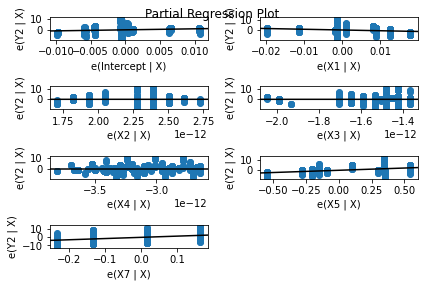

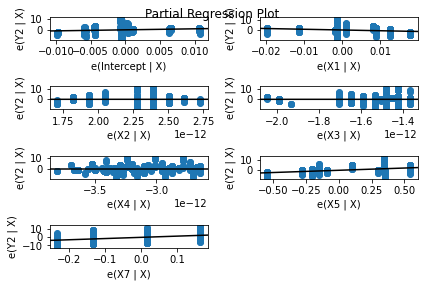

In [42]:
# added variable plot for the  model03
sm.graphics.plot_partregress_grid(model03)

Text(0, 0.5, 'Predicted_values')

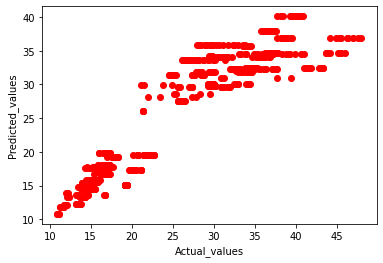

In [43]:
# plot a scatter plot
plt.scatter(data.Y2,pred03,c="r");plt.xlabel("Actual_values");plt.ylabel("Predicted_values")

In [44]:
m,b=np.polyfit(data.Y2,pred03,1)

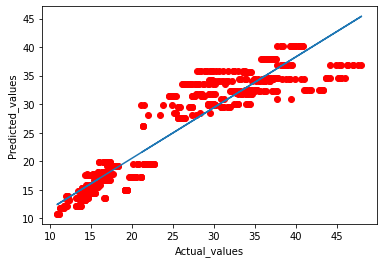

In [45]:
plt.scatter(data.Y2,pred03,c="r");plt.xlabel("Actual_values");plt.ylabel("Predicted_values") ;plt.plot(data.Y2,m*data.Y2+b)

Text(0, 0.5, 'residuals')

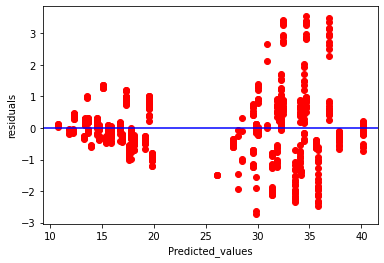

In [46]:
#residual value vs Predicted values
plt.scatter(pred03,model03.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("Predicted_values");plt.ylabel("residuals")

(array([ 14.,  33.,  61., 210., 253., 120.,  40.,   7.,  12.,  18.]),
 array([-2.72584278, -2.09940333, -1.47296388, -0.84652444, -0.22008499,
         0.40635446,  1.03279391,  1.65923336,  2.28567281,  2.91211226,
         3.5385517 ]),
 <BarContainer object of 10 artists>)

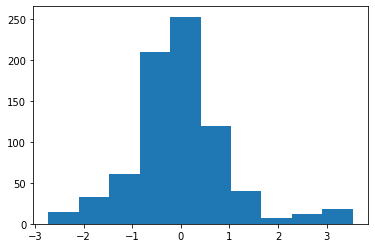

In [47]:
########    Normality plot for residuals ######
# histogram
plt.hist(model03.resid_pearson) # Checking the standardized residuals are normally distributed

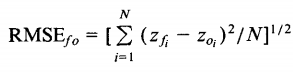

In [20]:
from IPython.display import Image
Image("root-mean-square-error.png")

Where:
Σ = summation (“add up”)
(zfi – Zoi)2 = differences, squared
N = sample size.

The simple steps to calculate RMSE is
1.Squaring the residuals.
2.Finding the average of the residuals.
3.Taking the square root of the result.

The smaller the RMSE, the better the model fits your data.

In [49]:
data_resid=pred03-data.Y2
rmse_LR=np.sqrt(np.mean(data_resid*data_resid))
rmse_LR  # RMSE for data

3.187968984897448

In [50]:
from sklearn.metrics import r2_score
R2_LR=np.mean(r2_score(Y,pred03))  # Calculating R2 score for data
R2_LR

0.8875573328171108

In [51]:
# Splitting the data into train and test data 

data_train,data_test  = train_test_split(data,test_size = 0.3,random_state=22) # 30% size

data_train.shape,'  ',data_test.shape

((537, 9), '  ', (231, 9))

In [52]:
# preparing the model on train data 

model_train = smf.ols("Y2~X1+X2+X3+X4+X5+X7",data=data_train).fit()

# train_data prediction
train_pred = model_train.predict(data_train)

In [53]:
# train residual values 
train_resid  = train_pred - data_train.Y2
train_resid

88    -4.267207
602   -0.377172
235   -4.377207
565    1.129973
548    0.856727
         ...   
491   -1.492995
502    2.462715
358    0.912715
356    1.322715
132   -0.128050
Length: 537, dtype: float64

In [54]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

3.2771617445015138

In [55]:
# preparing the model on testing data 

model_test = smf.ols("Y2~X1+X2+X3+X4+X5+X7",data=data_test).fit()

# test_data prediction
test_pred = model_test.predict(data_test)
# test residual values 
test_resid  = test_pred - data_test.Y2
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse


2.9453156569492003

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=23)
dt_model.fit(X_train, y_train)
y_pred1 = dt_model.predict(X_test)
R2_dt = np.mean(r2_score(y_test, y_pred1))

print(R2_dt)

0.9703091270070984


In [57]:
from sklearn.metrics import mean_squared_error

from math import sqrt
rmse_dt = sqrt(mean_squared_error(y_test, y_pred1))

rmse_dt

1.6493758494171944

# Gradient Boosting 

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
GB_model= GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
GB_model.score(X_test,y_test)

0.9778057189307927

In [59]:
y_pred4 = GB_model.predict(X_test)
R2_GB = np.mean(r2_score(y_test, y_pred4))
R2_GB

0.9778057189307927

In [60]:
rmse_GB = sqrt(mean_squared_error(y_test, y_pred4))

rmse_GB

1.4260300866395208

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(X_train, y_train)
y_pred3 = rf_model.predict(X_test)
R2_rf = np.mean(r2_score(y_test, y_pred3))
R2_rf

0.9712465332977752

In [62]:
rmse_rf = sqrt(mean_squared_error(y_test, y_pred3))

rmse_rf

1.6231298114728112

After doing Random forest Regression we try to compute with Extra Tree Regression which is similar to the Random Forest.

# Extra tree

In [63]:
from sklearn.ensemble import ExtraTreesRegressor
et_model = ExtraTreesRegressor(random_state=123)
et_model.fit(X_train, y_train)
y_pred2 = et_model.predict(X_test)
R2_et = np.mean(r2_score(y_test, y_pred2))
R2_et

0.967534053861643

In [64]:
rmse_et = sqrt(mean_squared_error(y_test, y_pred2))

rmse_et

1.724734217381348

# XG Boosting

In [65]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9915741144198376

In [66]:
y_pred5 = et_model.predict(X_test)
R2_XGB = np.mean(r2_score(y_test, y_pred5))
R2_XGB

0.967534053861643

In [67]:
rmse_XGB = sqrt(mean_squared_error(y_test, y_pred5))

rmse_XGB

1.724734217381348

# Support Vector Regressor

In [68]:
from sklearn.svm import SVR
model_svr=SVR().fit(X_train,y_train)
model_svr.score(X_test,y_test)

0.7171113714777373

In [69]:
y_pred7 = model_svr.predict(X_test)
R2_svr = np.mean(r2_score(y_test, y_pred7))
R2_svr

0.7171113714777373

In [70]:
rmse_svr = sqrt(mean_squared_error(y_test, y_pred7))

rmse_svr

5.091149998721817

In [71]:
models= pd.DataFrame({ 
"Model" : ["Linear Regression","Decision Tree","Extra Tree","Random Forest","Gradient Boosting","XG Boosting","Support Vector Regressor"],
"R2 Score" : [R2_LR,R2_dt,R2_et,R2_rf,R2_GB,R2_XGB,R2_svr],
"RMSE Value" : [rmse_LR,rmse_dt,rmse_et,rmse_rf,rmse_GB,rmse_XGB,rmse_svr]

})

In [72]:
models

,Model,R2 Score,RMSE Value
0,Linear Regression,0.887557,3.187969
1,Decision Tree,0.970309,1.649376
2,Extra Tree,0.967534,1.724734
3,Random Forest,0.971247,1.623130
4,Gradient Boosting,0.977806,1.426030
5,XG Boosting,0.967534,1.724734
6,Support Vector Regressor,0.717111,5.091150


In [73]:
models.sort_values(by="R2 Score")

,Model,R2 Score,RMSE Value
6,Support Vector Regressor,0.717111,5.091150
0,Linear Regression,0.887557,3.187969
2,Extra Tree,0.967534,1.724734
5,XG Boosting,0.967534,1.724734
1,Decision Tree,0.970309,1.649376
3,Random Forest,0.971247,1.623130
4,Gradient Boosting,0.977806,1.426030


In [74]:
models.sort_values(by="RMSE Value")

,Model,R2 Score,RMSE Value
4,Gradient Boosting,0.977806,1.426030
3,Random Forest,0.971247,1.623130
1,Decision Tree,0.970309,1.649376
2,Extra Tree,0.967534,1.724734
5,XG Boosting,0.967534,1.724734
0,Linear Regression,0.887557,3.187969
6,Support Vector Regressor,0.717111,5.091150


# For Heating Load

In [75]:
data = pd.read_excel("ENB2012_data.xlsx")  # LOad  data

In [76]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [77]:
data.drop("Y2",axis=1,inplace=True) # Here we drop y2 column because we have to calculate for Y1(Heating Load).
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,NaN,NaN


In [78]:
# Now we split our model into X and Y parts to finally predict the results using several algorithms.

X=data[data.columns[:8]]  
Y=data['Y1']   #Dependent attribute of heating load

In [79]:
X.shape,' ',Y.shape

((768, 8), ' ', (768,))

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

print(X_train.shape,"  ",X_test.shape)
print(y_train.shape,"  ",y_test.shape)

(537, 8)    (231, 8)
(537,)    (231,)


In [81]:
data.corr()   #Calculating co-relation

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Unnamed: 10,Unnamed: 11
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,NaN,NaN
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,NaN,NaN
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,NaN,NaN
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,NaN,NaN
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,NaN,NaN
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,NaN,NaN
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,NaN,NaN
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,NaN,NaN
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,NaN,NaN
Unnamed: 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

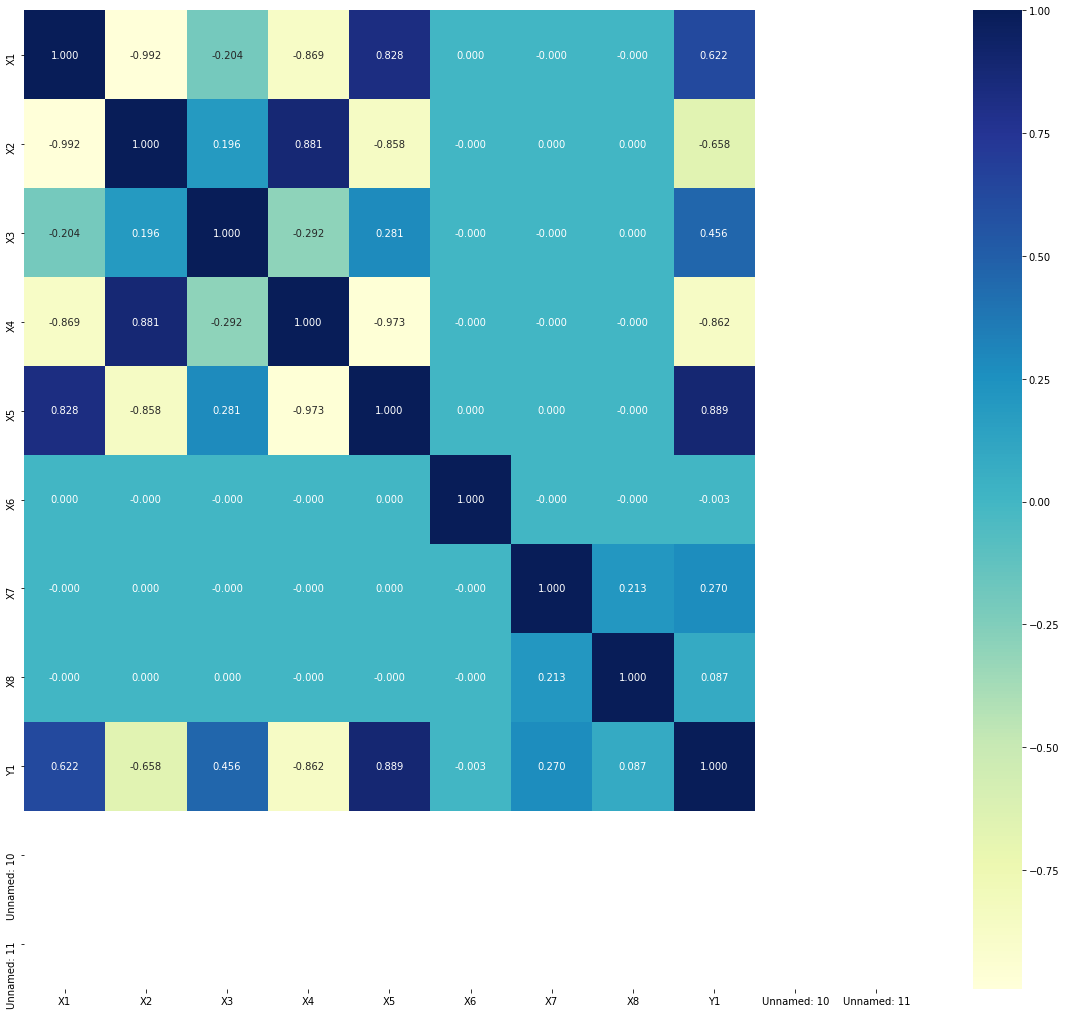

In [82]:
plt.subplots(figsize=(20,18))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu",fmt='0.3f')

In [83]:
import statsmodels.formula.api as smf # fitting regression model

model02 = smf.ols('Y1~X1+X2+X3+X4+X5+X6+X7+X8', data = data).fit()

In [84]:
model02.params

Intercept    84.013418
X1          -64.773432
X2           -0.062606
X3            0.036129
X4           -0.049368
X5            4.169954
X6           -0.023330
X7           19.932736
X8            0.203777
dtype: float64

In [85]:
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:54:39   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.0134     19.034      4.414      0.000      46.649     121.378
X1           -64.7734     10.289     -6.295      0.000     -84.973     -44.574
X2            -0.0626      0.013     -4.670      0.000      -0.089      -0.036
X3             0.0361      0.004      9.386      0.000       0.029       0.044
X4            -0.0494      0.008     -6.569      0.000      -0.064      -0.035
X5             4.1700      0.338     12.338      0.000       3.506       4.833
X6            -0.0233      0.095     -0.246      0.805      -0.209       0.163
X7            19.9327      0.814     24.488      0.000      18.335      21.531
X8             0.2038      0.070      2.915      0.004       0.067       0.341
==============================================================================
Omnibus:                       18.647   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.707
Skew:                           0.044   Prob(JB):                     6.49e-09
Kurtosis:                       4.082   Cond. No.                     1.09e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.81e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [86]:
model03=smf.ols('Y1~X1+X2+X3+X4+X5+X7+X8',data=data).fit()  # fitting the model by droping X6
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1387.
Date:                Thu, 12 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:54:39   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3839.
Df Residuals:                     761   BIC:                             3871.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.9318     19.019      4.413      0.000      46.596     121.268
X1           -64.7734     10.283     -6.299      0.000     -84.960     -44.587
X2            -0.0626      0.013     -4.673      0.000      -0.089      -0.036
X3             0.0361      0.004      9.392      0.000       0.029       0.044
X4            -0.0494      0.008     -6.573      0.000      -0.064      -0.035
X5             4.1700      0.338     12.345      0.000       3.507       4.833
X7            19.9327      0.813     24.503      0.000      18.336      21.530
X8             0.2038      0.070      2.916      0.004       0.067       0.341
==============================================================================
Omnibus:                       18.654   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.739
Skew:                           0.044   Prob(JB):                     6.38e-09
Kurtosis:                       4.082   Cond. No.                     1.09e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.81e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [87]:
pred03=model03.predict(data)  #predicting 
pred03

0      22.612183
1      22.612183
2      22.612183
3      22.612183
4      25.006803
         ...    
763    18.487654
764    19.134457
765    19.134457
766    19.134457
767    19.134457
Length: 768, dtype: float64

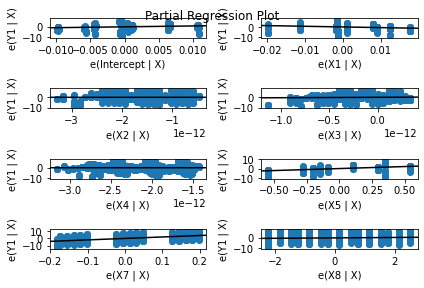

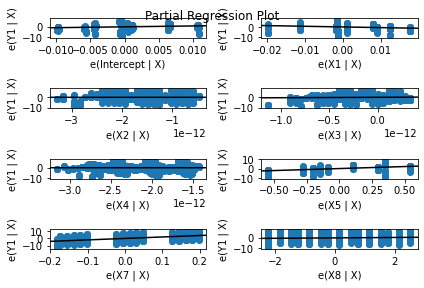

In [88]:
# added variable plot for the  model03
sm.graphics.plot_partregress_grid(model03)

Text(0, 0.5, 'predicted_values')

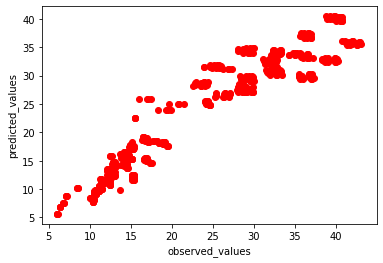

In [89]:
# Observed values VS Predicted values
plt.scatter(data.Y1,pred03,c="r");plt.xlabel("observed_values");plt.ylabel("predicted_values")

In [90]:
m,b=np.polyfit(data.Y1,pred03,1)

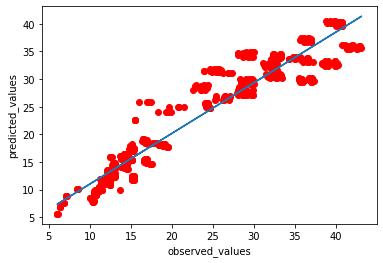

In [91]:
plt.scatter(data.Y1,pred03,c="r");plt.xlabel("observed_values");plt.ylabel("predicted_values");plt.plot(data.Y1,m*data.Y1+b)

Text(0, 0.5, 'residuals')

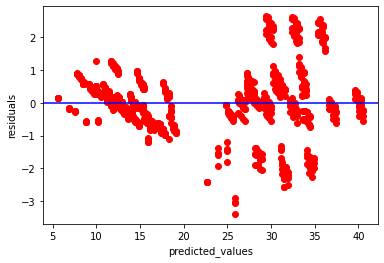

In [92]:
#residual value vs predicted values
plt.scatter(pred03,model03.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("predicted_values");plt.ylabel("residuals")

(array([  4.,  14.,  43.,  27., 134., 271., 167.,  48.,  17.,  43.]),
 array([-3.38669225, -2.78487227, -2.1830523 , -1.58123232, -0.97941235,
        -0.37759237,  0.2242276 ,  0.82604758,  1.42786755,  2.02968753,
         2.6315075 ]),
 <BarContainer object of 10 artists>)

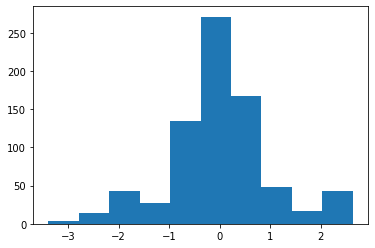

In [93]:
########    Normality plot for residuals ######
# histogram
plt.hist(model03.resid_pearson) # Checking the standardized residuals are normally distributed

In [94]:
# Splitting the data into train and test data 

data_train,data_test  = train_test_split(data,test_size = 0.3,random_state=22) # 30% size

data_train.shape,'  ',data_test.shape

((537, 11), '  ', (231, 11))

In [95]:
# preparing the model on train data 

model_train = smf.ols("Y1~X1+X2+X3+X4+X5+X7+X8",data=data_train).fit()

# train_data prediction
train_pred = model_train.predict(data_train)

In [96]:
# train residual values 
train_resid  = train_pred - data_train.Y1

In [97]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

2.914656888178613

In [98]:
# preparing the model on testing data 

model_test = smf.ols("Y1~X1+X2+X3+X4+X5+X7+X8",data=data_test).fit()

# test_data prediction
test_pred = model_test.predict(data_test)
# test residual values 
test_resid  = test_pred - data_test.Y1
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse


2.9126621739432546

In [99]:
data_resid=pred03-data.Y1
rmse_LR=np.sqrt(np.mean(data_resid*data_resid))
rmse_LR  #RMSE for data

2.9191119812454103

In [100]:
R2_LR = np.mean(r2_score(Y, pred03))
R2_LR

0.9161954736036447

# Decision Tree

In [101]:
#Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=123)
dt_model.fit(X_train, y_train)
y_pred1 = dt_model.predict(X_test)
R2_dt = np.mean(r2_score(y_test, y_pred1))
R2_dt

0.9963290097667226

In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_dt = sqrt(mean_squared_error(y_test, y_pred1))

rmse_dt

0.6120109355897045

# Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(X_train, y_train)
y_pred3 = rf_model.predict(X_test)
R2_rf = np.mean(r2_score(y_test, y_pred3))
R2_rf

0.9971364766435782

In [104]:
rmse_rf = sqrt(mean_squared_error(y_test, y_pred3))

rmse_rf

0.5405276724658071

# Extra tree

In [105]:
from sklearn.ensemble import ExtraTreesRegressor
et_model = ExtraTreesRegressor(random_state=123)
et_model.fit(X_train, y_train)
y_pred2 = et_model.predict(X_test)
R2_et = np.mean(r2_score(y_test, y_pred2))
R2_et

0.9971596975938257

In [106]:
rmse_et = sqrt(mean_squared_error(y_test, y_pred2))

rmse_et

0.5383315814641906

# Gradient Boosting

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
GB_model= GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
GB_model.score(X_test,y_test)

0.9971947679940186

In [108]:
y_pred4 = GB_model.predict(X_test)
R2_GB = np.mean(r2_score(y_test, y_pred4))
R2_GB

0.9971947679940186

In [109]:
rmse_GB = sqrt(mean_squared_error(y_test, y_pred4))

rmse_GB

0.5349977560180595

# XG Boosting

In [110]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.998557897608579

In [111]:
y_pred5 = et_model.predict(X_test)
R2_XGB = np.mean(r2_score(y_test, y_pred5))
R2_XGB

0.9971596975938257

In [112]:
rmse_XGB = sqrt(mean_squared_error(y_test, y_pred5))

rmse_XGB

0.5383315814641906

# Support Vector Regressor

In [113]:
from sklearn.svm import SVR
model_svr=SVR().fit(X_train,y_train)
model_svr.score(X_test,y_test)

0.7094799336186826

In [114]:
y_pred7 = model_svr.predict(X_test)
R2_svr = np.mean(r2_score(y_test, y_pred7))
R2_svr

0.7094799336186826

In [115]:
rmse_svr = sqrt(mean_squared_error(y_test, y_pred7))

rmse_svr

5.444470326412361

In [116]:
models_2= pd.DataFrame({ 
"Model" : ["Linear Regression","Decision Tree","Extra Tree","Random Forest","Gradient Boosting","XG Boosting"],
"R2 Score" : [R2_LR,R2_dt,R2_et,R2_rf,R2_GB,R2_XGB],
"RMSE Value" : [rmse_LR,rmse_dt,rmse_et,rmse_rf,rmse_GB,R2_XGB]

})

In [117]:
models_2

,Model,R2 Score,RMSE Value
0,Linear Regression,0.916195,2.919112
1,Decision Tree,0.996329,0.612011
2,Extra Tree,0.997160,0.538332
3,Random Forest,0.997136,0.540528
4,Gradient Boosting,0.997195,0.534998
5,XG Boosting,0.997160,0.997160


In [118]:
models_2.sort_values(by="R2 Score")

,Model,R2 Score,RMSE Value
0,Linear Regression,0.916195,2.919112
1,Decision Tree,0.996329,0.612011
3,Random Forest,0.997136,0.540528
2,Extra Tree,0.997160,0.538332
5,XG Boosting,0.997160,0.997160
4,Gradient Boosting,0.997195,0.534998


In [119]:
models_2.sort_values(by="RMSE Value")

,Model,R2 Score,RMSE Value
4,Gradient Boosting,0.997195,0.534998
2,Extra Tree,0.997160,0.538332
3,Random Forest,0.997136,0.540528
1,Decision Tree,0.996329,0.612011
5,XG Boosting,0.997160,0.997160
0,Linear Regression,0.916195,2.919112


# Regression using Sklearn

We are now try to perform regression of this two dependent attribute i.e cooling load and heating load in one model

In [120]:
data1=pd.read_excel("ENB2012_data.xlsx")

In [121]:
data1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [124]:
data1=data1.drop(['Unnamed: 10','Unnamed: 11'], axis=1)

In [125]:
X=data1[data1.columns[:8]] 
Y=data1[data1.columns[8:]]  # Here we placed two attributes
X.shape," ",Y.shape

((768, 8), ' ', (768, 2))

In [126]:
from sklearn.linear_model import LinearRegression  # fitting model
model01=LinearRegression().fit(X,Y)
model01

LinearRegression()

In [127]:
pred01=model01.predict(X)   # predicting
pred01

array([[22.64757481, 25.83896961],
       [22.62424045, 25.96045437],
       [22.60090609, 26.08193912],
       ...,
       [19.14574378, 19.87803268],
       [19.12240942, 19.99951743],
       [19.09907505, 20.12100219]])

In [128]:
Y

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [129]:
pred01[:,0]  

array([22.64757481, 22.62424045, 22.60090609, 22.57757172, 25.0421485 ,
       25.01881414, 24.99547978, 24.97214541, 24.00463572, 23.98130136,
       23.957967  , 23.93463263, 25.94677439, 25.92344003, 25.90010567,
       25.87677131, 27.24120799, 27.21787363, 27.19453926, 27.1712049 ,
       31.51565924, 31.49232488, 31.46899052, 31.44565616,  5.64804403,
        5.62470967,  5.6013753 ,  5.57804094,  6.94247762,  6.91914326,
        6.8958089 ,  6.87247454,  7.588962  ,  7.56562764,  7.54229327,
        7.51895891,  8.88388387,  8.86054951,  8.83721515,  8.81388079,
        9.53061239,  9.50727803,  9.48394366,  9.4606093 , 10.17709676,
       10.1537624 , 10.13042804, 10.10709368, 24.84462589, 24.82129152,
       24.79795716, 24.7746228 , 27.23919957, 27.21586521, 27.19253085,
       27.16919649, 26.20168679, 26.17835243, 26.15501807, 26.13168371,
       28.14382547, 28.1204911 , 28.09715674, 28.07382238, 29.43825906,
       29.4149247 , 29.39159033, 29.36825597, 33.71271032, 33.68

In [130]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse_LR = sqrt(mean_squared_error(Y, pred01))        # RMSE of complete Y

rmse_LR

3.054691115141613

In [131]:
from sklearn.metrics import mean_squared_error

from math import sqrt
rmse_sl_Y1 = sqrt(mean_squared_error(Y.Y1,pred01[:,0]))   #RMSE of Y1

rmse_sl_Y1

2.9189987865866724

In [132]:
from sklearn.metrics import mean_squared_error

from math import sqrt
rmse_sl_Y2 = sqrt(mean_squared_error(Y.Y2,pred01[:,1]))   # RMSE of Y2

rmse_sl_Y2

3.1846069932969367

In [133]:
from sklearn.metrics import r2_score
R2_LR=np.mean(r2_score(Y,pred01))   #R squared score of complete Y
R2_LR

0.9019981709246218

In [134]:
from sklearn.metrics import r2_score
R2_LR_Y1=np.mean(r2_score(Y.Y1,pred01[:,0]))   #R squared score of Y1
R2_LR_Y1

0.9162019728684232

In [135]:
from sklearn.metrics import r2_score
R2_LR_Y2=np.mean(r2_score(Y.Y2,pred01[:,1]))   #R squared score of Y2
R2_LR_Y2

0.8877943689808205

By observing both stats model and sklearn model both outcomes are same.
So, we conclude that results of both regresion model is same , it's complete our decision whether to choose any one from it.

# Random forest

In [164]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(X,Y)
y_pred4 = rf_model.predict(X)
R2_rf = np.mean(r2_score(Y, y_pred4))
R2_rf

0.9973522441429346

In [165]:
y_pred4

array([[16.1172, 22.0535],
       [15.8229, 21.4962],
       [15.7488, 21.4513],
       ...,
       [16.5179, 16.9714],
       [16.5402, 16.5728],
       [16.6264, 16.2331]])

In [176]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_dt = sqrt(mean_squared_error(Y, y_pred4))

rmse_dt

0.49086351880008605

In [175]:
from sklearn.metrics import r2_score
np.mean(r2_score(Y.Y1,y_pred4[:,0]))   #R squared score of Y2

0.9997115041231335

In [178]:
from sklearn.metrics import r2_score
np.mean(r2_score(Y.Y2,y_pred4[:,1]))

0.9949929841627356

In [179]:
import pickle
# save the model to disk
filename = 'EE_model_RF.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [ ]:
q={'gender':'1','ssc_p':'67.00','ssc_b':'1','hsc_p':'91.00','hsc_b':'1','hsc_s':'1','degree_p':'58.00','degree_t':'2','workex':'0','etest_p':'55.0','specialisation':'1','mba_p':'58.80'}
w=pd.DataFrame(q,index=[0])
w

In [180]:
a={'X1':[0.98,0.90,0.86,0.82,0.79],'X2':[514.50,563.50,588.00,612.00,637.00],'X3':[294.00,318.50,294.00,318.50,343.00],'X4':[110.25,122.50,147.00,147.00,147.00],'X5':[7.00,7.00,7.00,7.00,7.00],'X6':[2,3,4,5,2],'X7':[0.10,0.10,0.10,0.10,0.10],'X8':[1,1,1,1,1]}
b=pd.DataFrame.from_dict(a)
b

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.1,1
1,0.90,563.5,318.5,122.50,7.0,3,0.1,1
2,0.86,588.0,294.0,147.00,7.0,4,0.1,1
3,0.82,612.0,318.5,147.00,7.0,5,0.1,1
4,0.79,637.0,343.0,147.00,7.0,2,0.1,1


In [229]:
a={'X1':[0.98],'X2':[514.50],'X3':[294.00],'X4':[110.25],'X5':[7.00],'X6':[2],'X7':[0.10],'X8':[1]}
b=pd.DataFrame.from_dict(a)
b

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.1,1


In [230]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(b)


In [231]:
result

array([[24.5883, 26.4269]])

In [236]:
float(result[:,0])

24.58829999999999

In [243]:
t=np.around(result[:,0],2)
float(t)

24.59

In [239]:
print("The value of Heating load is",float(result[:,0]),"\n")

The value of Heating load is 24.58829999999999 

